# ASSISTments Data Mining Competition 2017 - Results

## Imports and constants

In [25]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

In [26]:
def plot(dims, layer, metric, title, ylabel):
    f = plt.figure()
    
    for hidden_dim in dims:
        name = str(hidden_dim) + '_' + str(layer)
        pickle_results = open('Results/results_' + name + '.pickle', "rb")
        results = pickle.load(pickle_results)
        
        plt.plot(results[metric], label=str(hidden_dim))
        plt.legend(prop={'size':20})
        plt.title(title + ' - ' + str(layer) + ' layers', fontsize=35)
        plt.xlabel('Epochs')
        plt.ylabel(ylabel)
        
    f.savefig('Plots/plot_' + metric + '_' + str(layer) + '.pdf', bbox_inches='tight')

## Training set

We can see that with 2 or 3 layers for our multilayer RNN, the system is able to learn. The greater the hidden dimension, the greater the risks of overfitting and the faster the learning

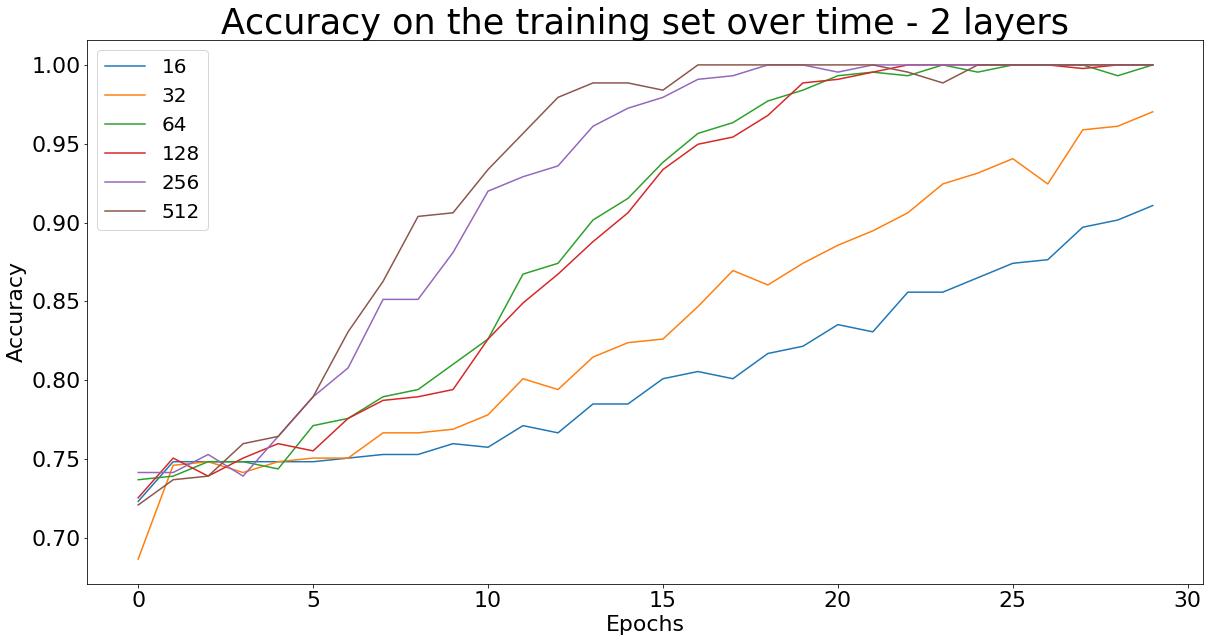

In [29]:
plot([16, 32, 64, 128, 256, 512], 2, 'accs', 'Accuracy on the training set over time', 'Accuracy')

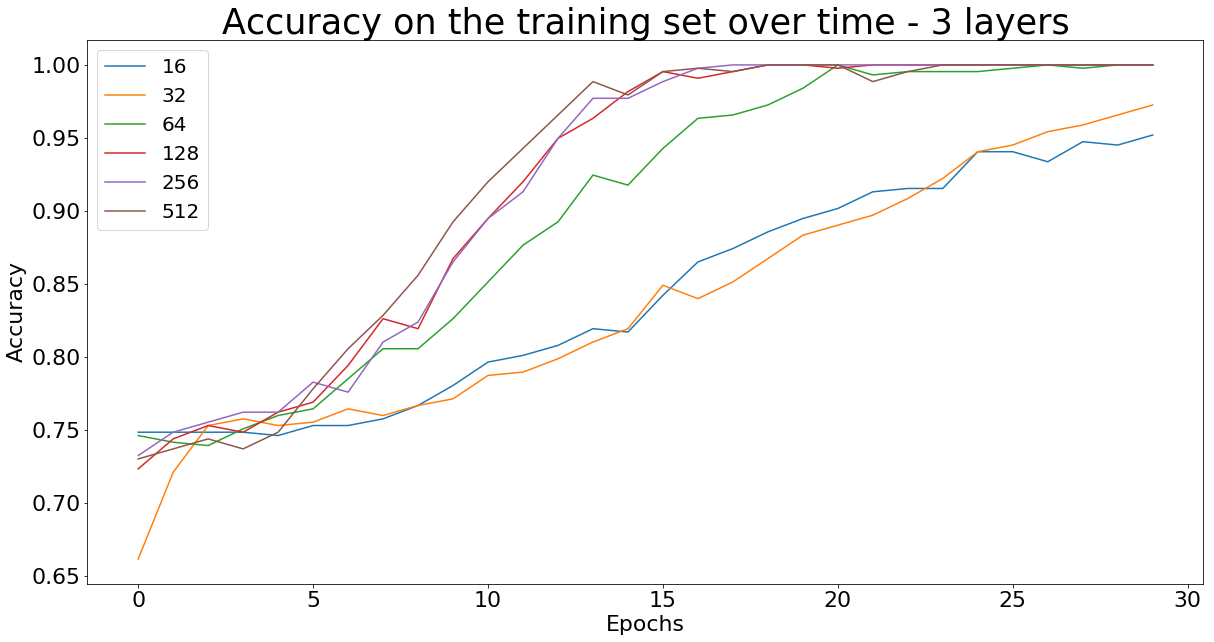

In [43]:
plot([16, 32, 64, 128, 256, 512], 3, 'accs', 'Accuracy on the training set over time', 'Accuracy')

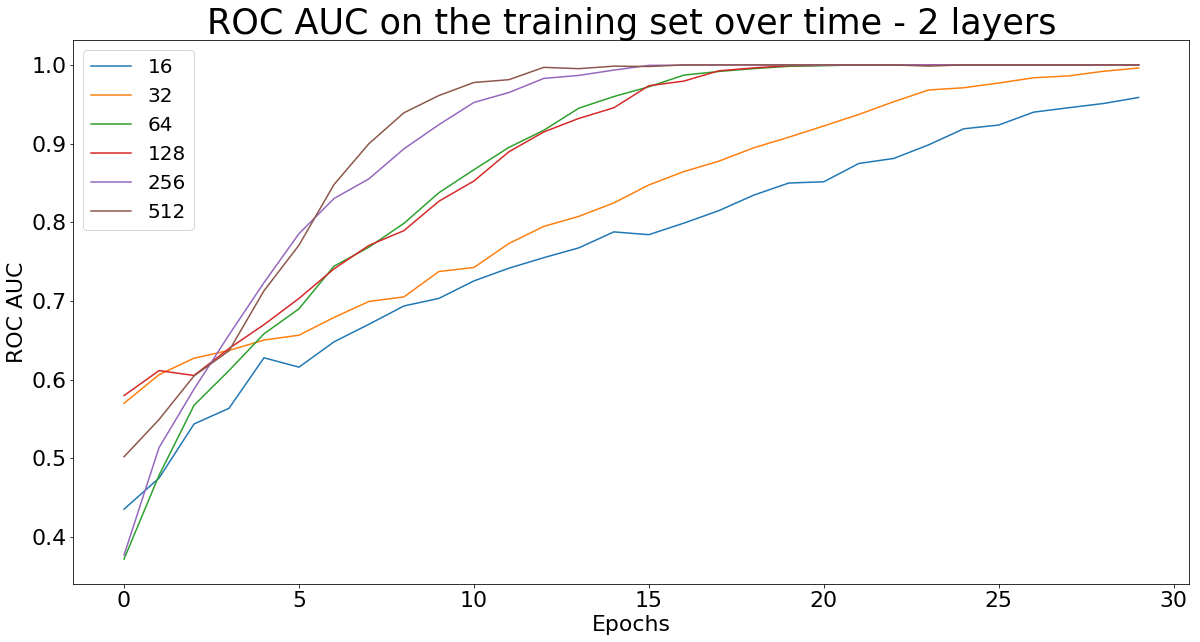

In [30]:
plot([16, 32, 64, 128, 256, 512], 2, 'aucs', 'ROC AUC on the training set over time', 'ROC AUC')

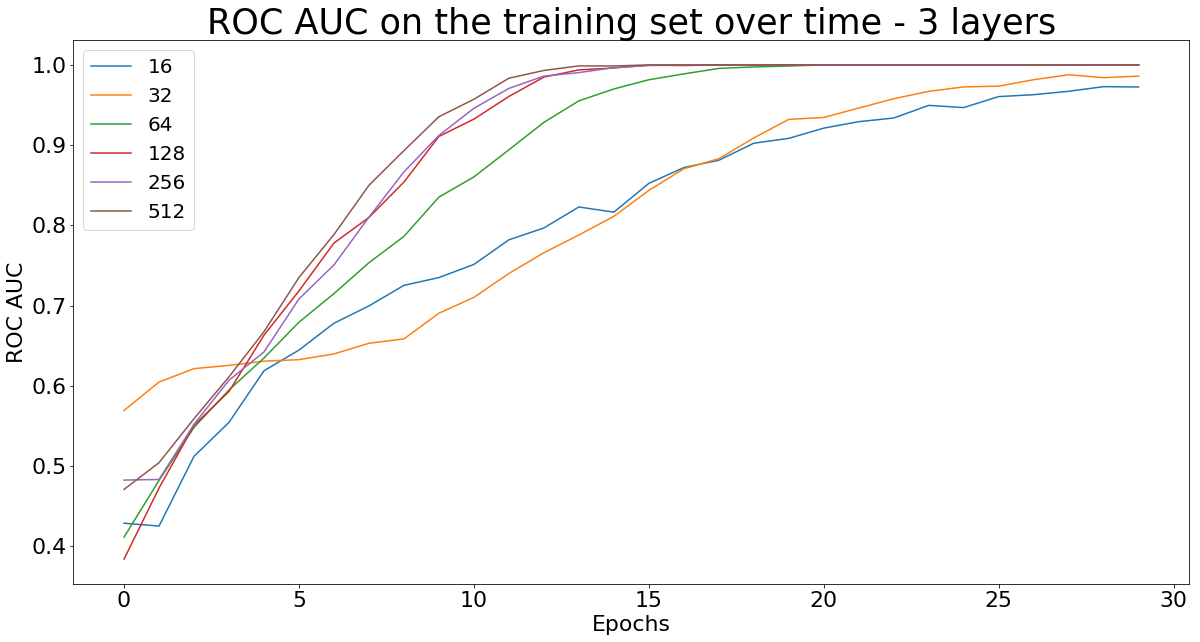

In [44]:
plot([16, 32, 64, 128, 256, 512], 3, 'aucs', 'ROC AUC on the training set over time', 'ROC AUC')

## Validation set

On the validation set, we can see the effects of the overfitting when the number of layers is too big or when the hidden dimension is.

Initially, the result on accuracy is concentrated around 75% as the model initially predicts only "0" for all inputs. After some training, the accuracy either drops because of overfitting or due to a simplistic model, or the accuracy increases over 75%, meaning that the model is able to accurately predict.

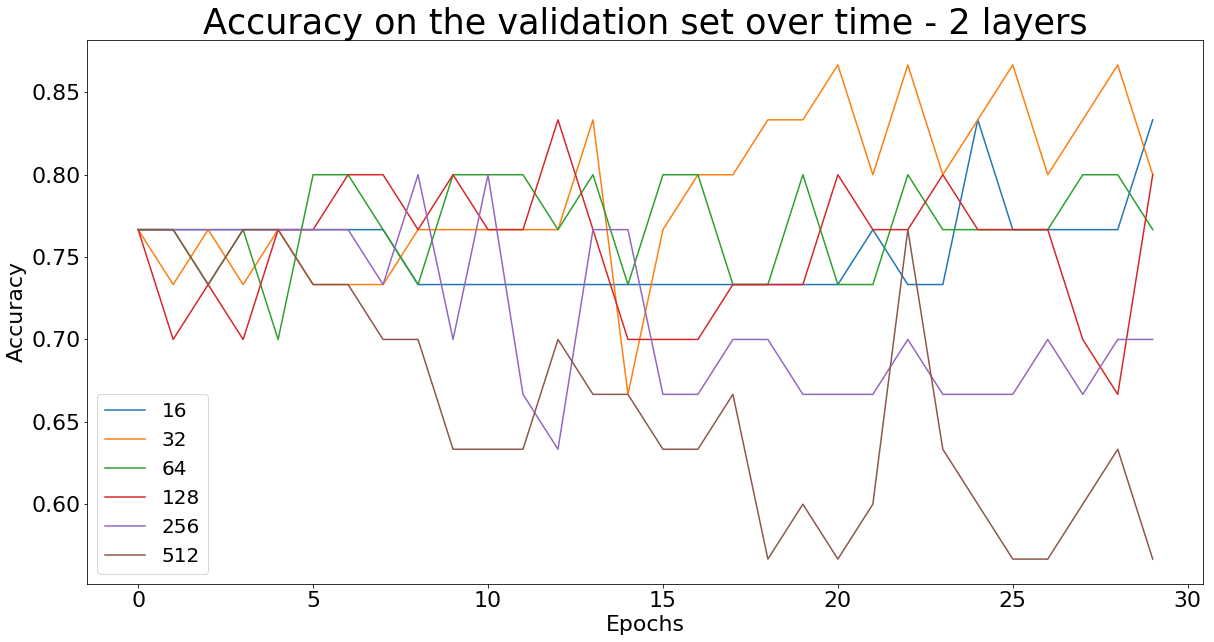

In [32]:
plot([16, 32, 64, 128, 256, 512], 2, 'val_accs', 'Accuracy on the validation set over time', 'Accuracy')

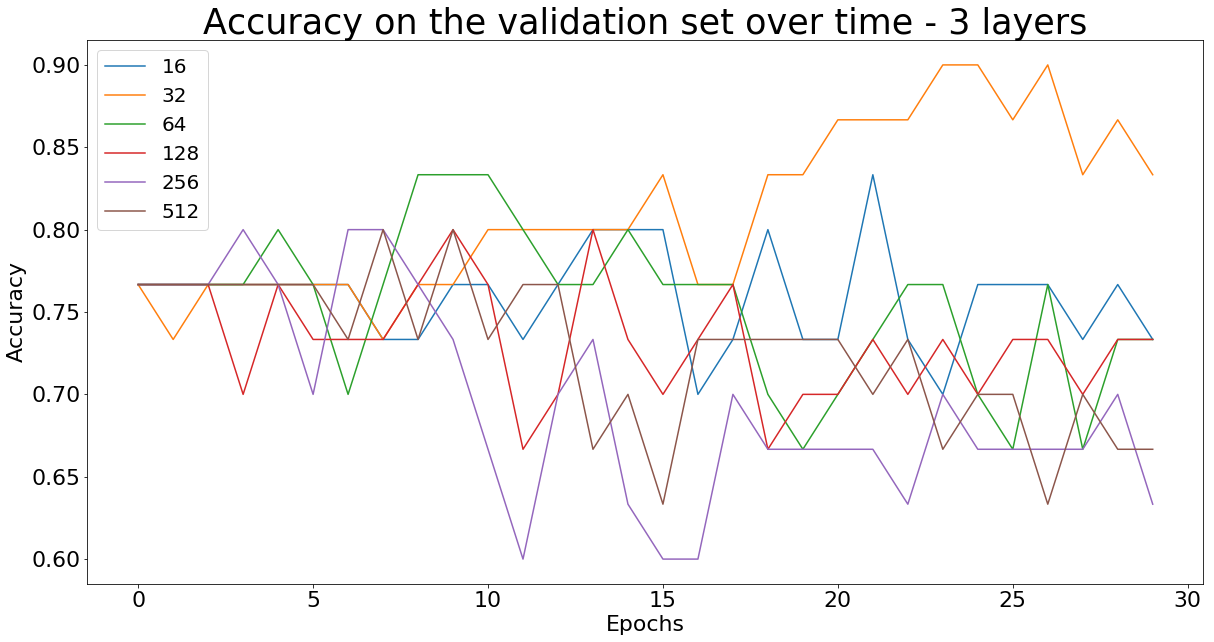

In [33]:
plot([16, 32, 64, 128, 256, 512], 3, 'val_accs', 'Accuracy on the validation set over time', 'Accuracy')

We can see that for 32 hidden dimension and 3 layers, the accuracy reaches 90%

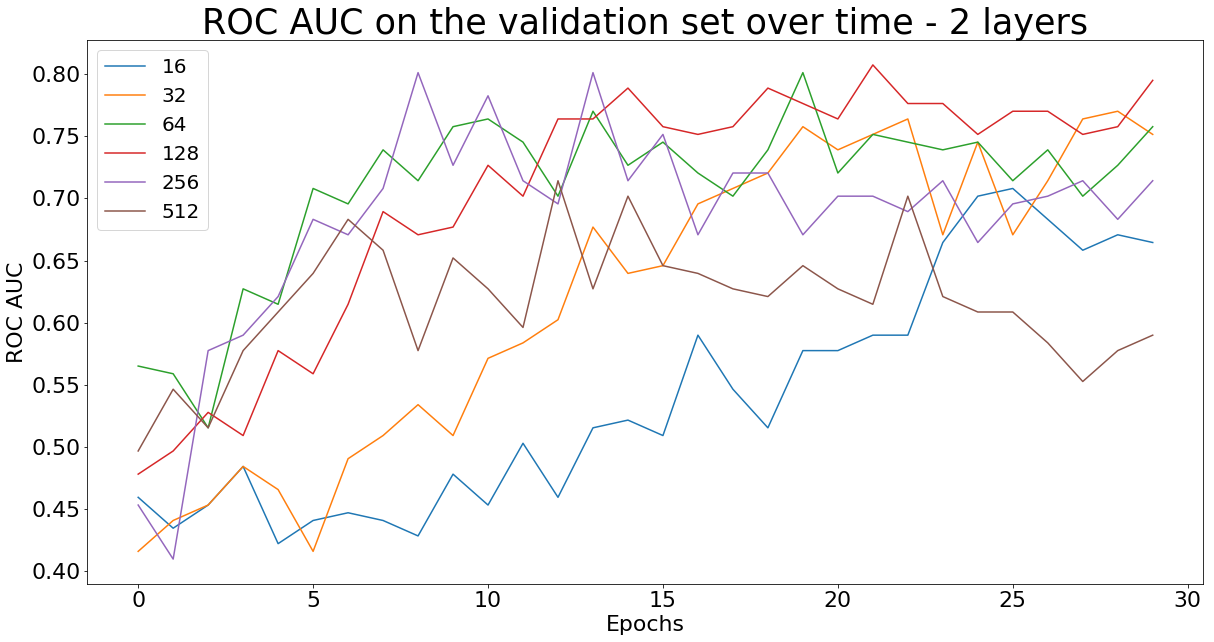

In [34]:
plot([16, 32, 64, 128, 256, 512], 2, 'val_aucs', 'ROC AUC on the validation set over time', 'ROC AUC')

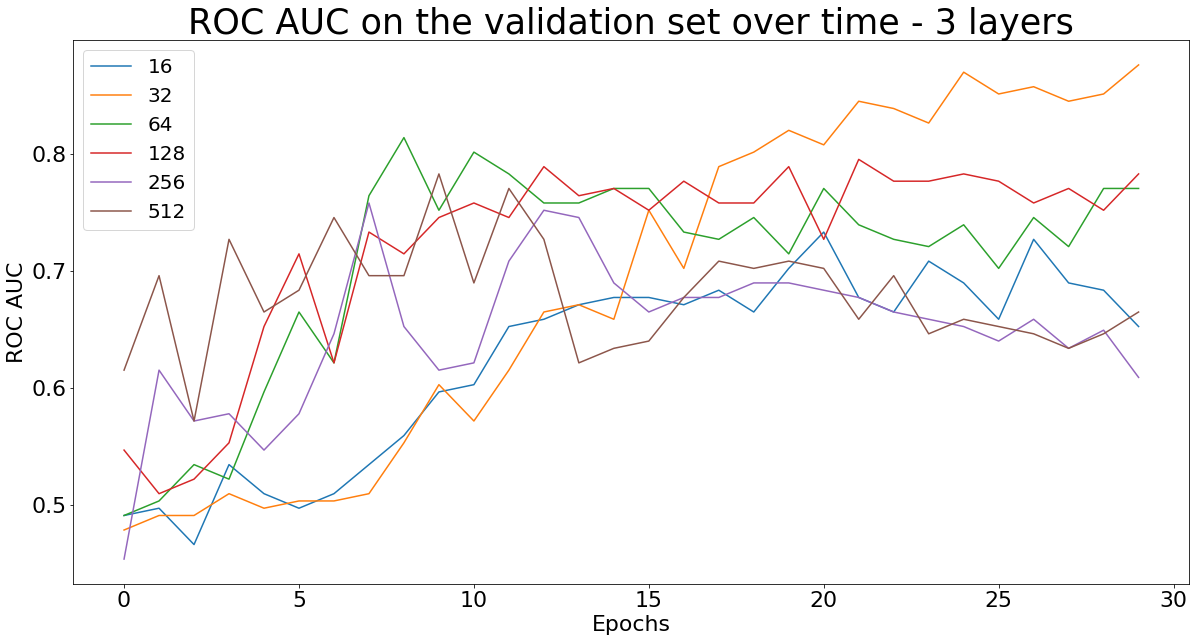

In [36]:
plot([16, 32, 64, 128, 256, 512], 3, 'val_aucs', 'ROC AUC on the validation set over time', 'ROC AUC')

If we isolate the best performing parameter: 32 hidden dim and 3 layers

In [37]:
pickle_results = open('Results/results_32_3.pickle', "rb")
results = pickle.load(pickle_results)

Text(0,0.5,'Metrics')

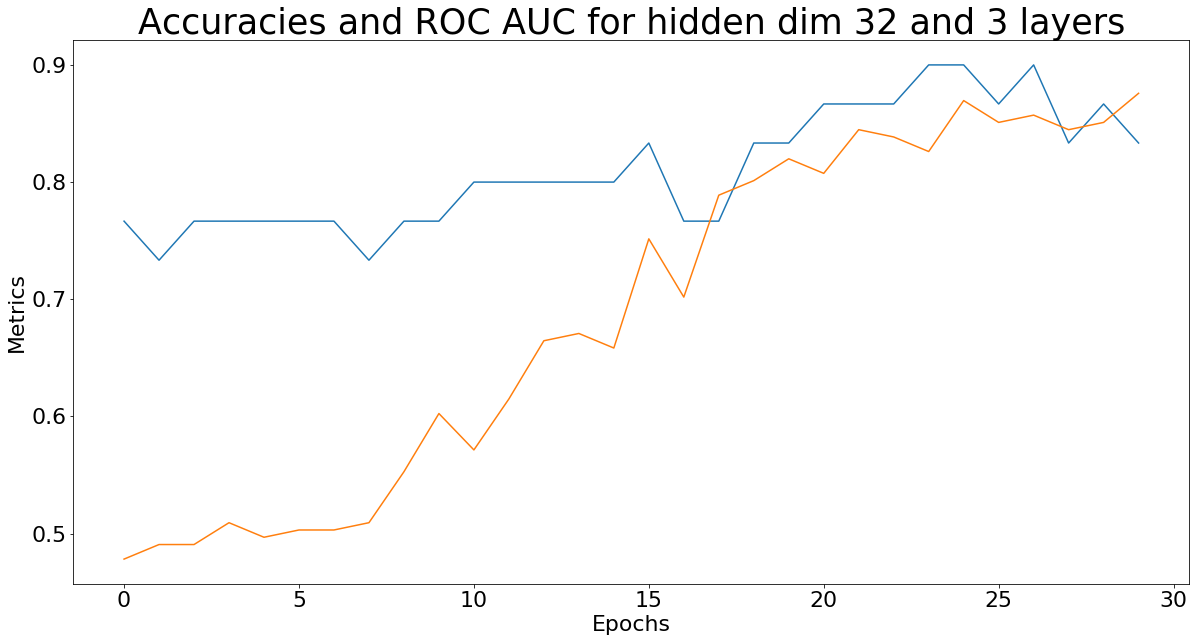

In [42]:
plt.plot(results['val_accs'])
plt.plot(results['val_aucs'])
plt.title('Accuracies and ROC AUC for hidden dim 32 and 3 layers', fontsize=35)
plt.xlabel('Epochs')
plt.ylabel('Metrics')